<a href="https://colab.research.google.com/github/HimanshuSahoo/Himanshu_Python/blob/main/Neural_Network_Assignment_2_gas_turbines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("gas_turbines.csv")

In [3]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
#dorping 'TIT' and 'CDP' as they are not ambient features
df = df.drop(['TIT','CDP'],axis=1)

In [5]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TAT,TEY,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,545.396183,134.188464,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,7.866803,15.829717,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,512.450000,100.170000,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,542.170000,127.985000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,549.890000,133.780000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,550.060000,140.895000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,550.610000,174.610000,44.103000,119.890000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TAT     15039 non-null  float64
 6   TEY     15039 non-null  float64
 7   CO      15039 non-null  float64
 8   NOX     15039 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


In [7]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TAT     0
TEY     0
CO      0
NOX     0
dtype: int64

In [8]:
df[df.duplicated()].shape

(0, 9)

In [9]:
array = df.values
X = array[:,0:8]
Y = array[:,8]

In [10]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [11]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()
model.add(Dense(30, input_dim=8,  activation='relu'))
model.add(Dense(15,  activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mean_squared_error'])

In [14]:
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 3s 2ms/step - loss: -23121574.0000 - mean_squared_error: 4812.4370 - val_loss: -83738432.0000 - val_mean_squared_error: 4242.1772
Epoch 2/250
1008/1008 [==============================] - 2s 2ms/step - loss: -298080160.0000 - mean_squared_error: 4812.4448 - val_loss: -557416896.0000 - val_mean_squared_error: 4242.1772
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: -1093618176.0000 - mean_squared_error: 4812.4390 - val_loss: -1588813184.0000 - val_mean_squared_error: 4242.1772
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: -2536031744.0000 - mean_squared_error: 4812.4443 - val_loss: -3264886528.0000 - val_mean_squared_error: 4242.1772
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: -4704698368.0000 - mean_squared_error: 4812.4375 - val_loss: -5652784640.0000 - val_mean_squared_error: 4242.1772
Epoch 6/250
1008/1008 [============================

In [15]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]/100))

470/470 [==============================] - 1s 1ms/step - loss: -199533912915968.0000 - mean_squared_error: 4624.2456
mean_squared_error: 46.24%


In [16]:
model.metrics_names

['loss', 'mean_squared_error']

In [17]:
model.history.history.keys()

dict_keys([])

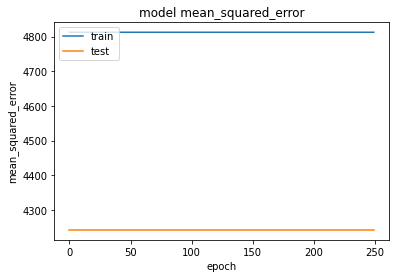

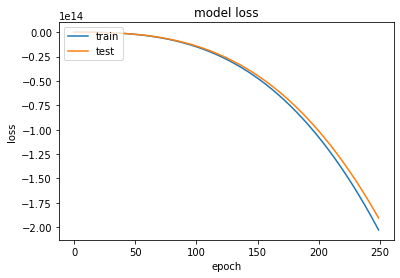

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()